In this notebook we compare decision tree classifier implemented from scratch: decision_tree_cls.py with sklearn DecisionTreeClassifier. We compare and visualize results with the help of dtreeviz library (a library specially designed for decision trees visualizations).

# Libs import

In [38]:
import dtreeviz
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from collections import Counter
from sklearn import datasets
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree, export_graphviz
import graphviz
import sys
sys.path.insert(0, 'C:/Users/grzesiek/Documents/Data Science/PycharmProjects/ML_from_scratch/Decision_tree_classyfier')

In [2]:
from decision_tree_cls import entropy, accuracy, Node, DecisionTreeCls

# Dataset

In [3]:
data = datasets.load_iris()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Decision tree classifier from scratch

In [53]:
my_clf = DecisionTreeCls(max_depth=3)
my_clf = my_clf.fit(X_train, y_train)
my_clf.export_text(data['feature_names'])

Root node: n_samples = 120, 
            splitting_feature = petal length (cm), 
            splitting_threshold = 1.9
|--- Node right: n_samples = 80, 
            splitting_feature = petal length (cm), 
            splitting_threshold = 4.9
|   |--- Node right: n_samples = 39, 
            splitting_feature = petal width (cm), 
            splitting_threshold = 1.6
|   |   |--- Leaf node right: 2
|   |   |--- Leaf node left: 2
|   |--- Node left: n_samples = 41, 
            splitting_feature = petal width (cm), 
            splitting_threshold = 1.6
|   |   |--- Leaf node right: 2
|   |   |--- Leaf node left: 1
|--- Leaf node left: 0


In [49]:
my_clf.feature_importance(data['feature_names']).sort_values(by='feature_importance', ascending=False).style.bar('feature_importance')

,feature_name,feature_importance
0,petal width (cm),0.918296
1,petal length (cm),0.722137
3,petal width (cm),0.298497
2,petal width (cm),0.079482


In [54]:
y_pred = my_clf.predict(X_test)
accuracy(y_test, y_pred)

0.9666666666666667

# Decision tree classifier from sklearn

In [55]:
parameters={
    'criterion':'entropy',# {“gini”, “entropy”, “log_loss”}
    'splitter':'best', # {“best”, “random”}
    'max_depth': 3,
    'min_samples_split': 2,
    'min_samples_leaf': 1,
    'min_weight_fraction_leaf': 0.0,
    'max_features': None, # int, float or {“auto”, “sqrt”, “log2”}, default=None
    'random_state': None, # int, RandomState instance or None, default=None
    'max_leaf_nodes': None, # int, default=None
    'min_impurity_decrease': 0.0, # float, default=0.0
    'class_weight': None, # dict, list of dict or “balanced”, default=None
    'ccp_alpha': 0.0, # non-negative float, default=0.0
}

clf = DecisionTreeClassifier(
    criterion=parameters['criterion'],
    splitter=parameters['splitter'], 
    max_depth=parameters['max_depth'],
    min_samples_split=parameters['min_samples_split'],
    min_samples_leaf=parameters['min_samples_leaf'],
    min_weight_fraction_leaf=parameters['min_weight_fraction_leaf'],
    max_features=parameters['max_features'],
    random_state=parameters['random_state'],
    max_leaf_nodes=parameters['max_leaf_nodes'],
    min_impurity_decrease=parameters['min_impurity_decrease'],
    class_weight=parameters['class_weight'],
    ccp_alpha=parameters['ccp_alpha']
    )
clf = clf.fit(X_train, y_train)

In [57]:
text = export_text(clf, feature_names=list(data['feature_names']))
print(text)

my_clf.export_text(data['feature_names'])

|--- petal length (cm) <= 2.45
|   |--- class: 0
|--- petal length (cm) >  2.45
|   |--- petal length (cm) <= 4.95
|   |   |--- petal width (cm) <= 1.65
|   |   |   |--- class: 1
|   |   |--- petal width (cm) >  1.65
|   |   |   |--- class: 2
|   |--- petal length (cm) >  4.95
|   |   |--- petal width (cm) <= 1.70
|   |   |   |--- class: 2
|   |   |--- petal width (cm) >  1.70
|   |   |   |--- class: 2

Root node: n_samples = 120, 
            splitting_feature = petal length (cm), 
            splitting_threshold = 1.9
|--- Node right: n_samples = 80, 
            splitting_feature = petal length (cm), 
            splitting_threshold = 4.9
|   |--- Node right: n_samples = 39, 
            splitting_feature = petal width (cm), 
            splitting_threshold = 1.6
|   |   |--- Leaf node right: 2
|   |   |--- Leaf node left: 2
|   |--- Node left: n_samples = 41, 
            splitting_feature = petal width (cm), 
            splitting_threshold = 1.6
|   |   |--- Leaf node right: 2
| 

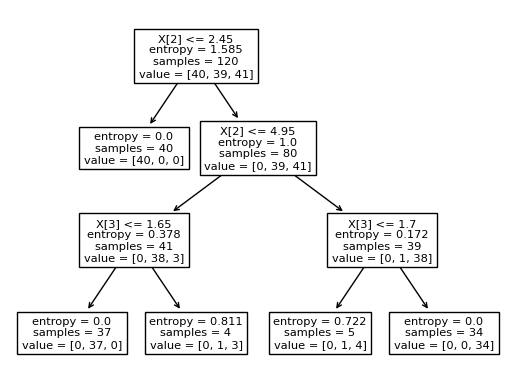

In [45]:
plot_tree(clf);

In [46]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin'

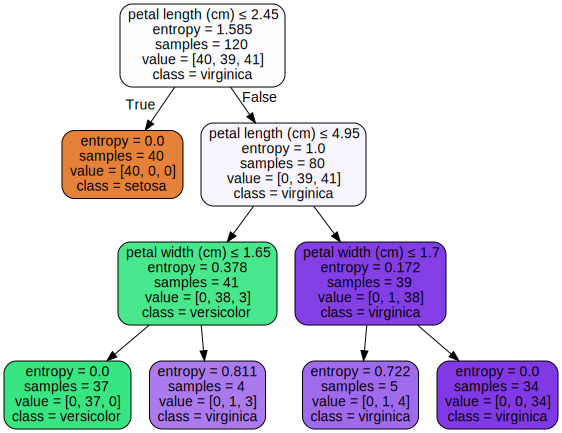

In [47]:
dot_data = export_graphviz(clf, out_file=None, 
                      feature_names=data.feature_names,  
                      class_names=data.target_names,  
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data)
graph

In [105]:
clf.tree_.threshold

array([ 2.44999999, -2.        ,  4.95000005,  1.65000004, -2.        ,
       -2.        ,  1.69999999, -2.        , -2.        ])

# Viz from dtreeviz

In [62]:
viz_model = dtreeviz.model(clf,
                           X_train=X_train, y_train=y_train,
                           feature_names=data['feature_names'],
                           class_names=data['target_names'])

## Tree view

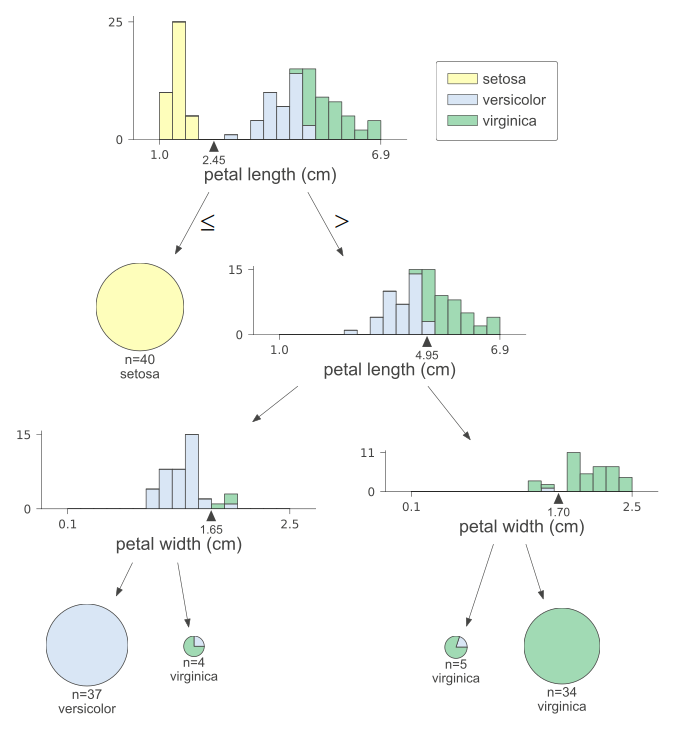

In [68]:
viz_model.view(scale=2)

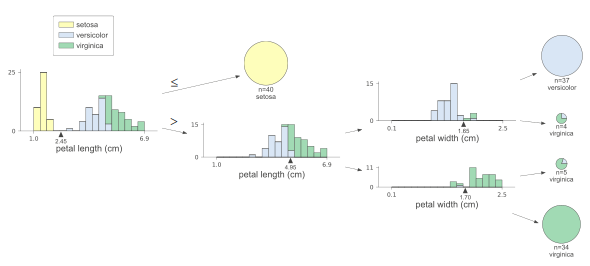

In [69]:
viz_model.view(orientation="LR")

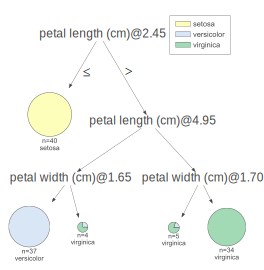

In [70]:
viz_model.view(fancy=False)

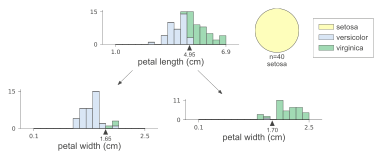

In [71]:
viz_model.view(depth_range_to_display=(1, 2))

## Path view

In [84]:
x = X[131]
x

array([7.9, 3.8, 6.4, 2. ])

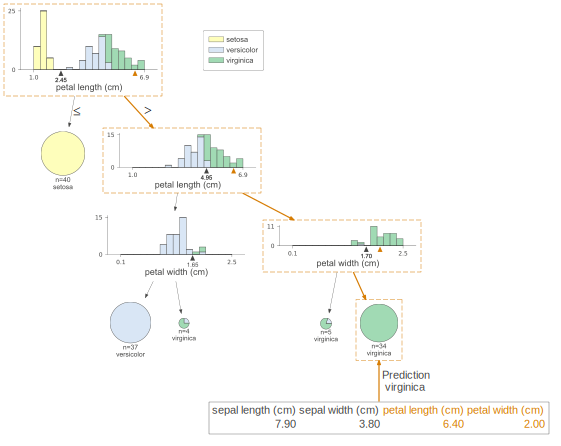

In [85]:
viz_model.view(x=x)

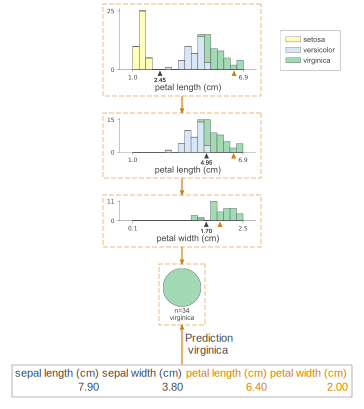

In [86]:
viz_model.view(x=x, show_just_path=True)

In [87]:
print(viz_model.explain_prediction_path(x))

4.95 <= petal length (cm) 
1.7 <= petal width (cm) 



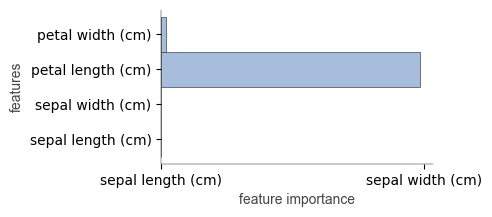

In [88]:
viz_model.instance_feature_importance(x, figsize=(3.5,2))

## Leaf

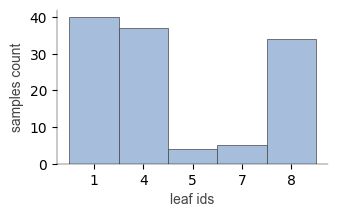

In [90]:
viz_model.leaf_sizes(figsize=(3.5,2))

In [92]:
viz_model.node_stats(node_id=6)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,39.000000,39.000000,39.000000,39.000000
mean,6.666667,2.979487,5.615385,2.012821
std,0.623797,0.324588,0.535350,0.277374
min,5.700000,2.200000,5.000000,1.400000
25%,6.300000,2.800000,5.100000,1.800000
50%,6.500000,3.000000,5.500000,2.000000
75%,7.150000,3.150000,5.950000,2.300000
max,7.900000,3.800000,6.900000,2.500000


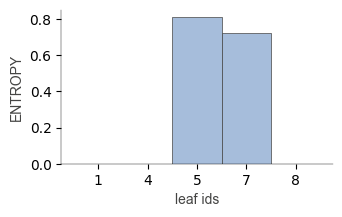

In [93]:
viz_model.leaf_purity(figsize=(3.5,2))

## Feature Space Partitioning

In [94]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
class_names = iris.target_names

X = X[:,2].reshape(-1,1) # petal length (cm)
y = iris.target

In [95]:
dtc_univar = DecisionTreeClassifier(max_depth=2, min_samples_leaf=1)
dtc_univar.fit(X, y)

DecisionTreeClassifier(max_depth=2)

In [96]:
viz_model = dtreeviz.model(dtc_univar,
                           X_train=X, y_train=y,
                           feature_names=['petal length (cm)'],
                           target_name='iris',
                           class_names=class_names)

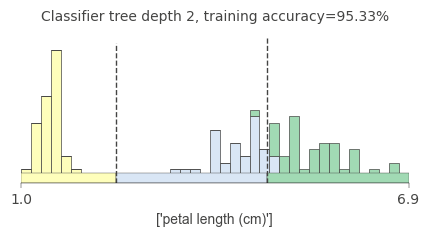

In [97]:
viz_model.ctree_feature_space(nbins=40, gtype='barstacked', show={'splits','title'},
                             figsize=(5,2))

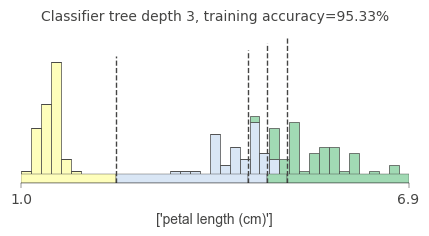

In [98]:
dtc_univar = DecisionTreeClassifier(max_depth=3, min_samples_leaf=1)
dtc_univar.fit(X, y)

viz_model = dtreeviz.model(dtc_univar,
                           X_train=X, y_train=y,
                           feature_names=['petal length (cm)'],
                           target_name='iris',
                           class_names=class_names)

viz_model.ctree_feature_space(nbins=40, gtype='barstacked', show={'splits','title'}, figsize=(5,2))

In [99]:
X = iris.data
X = X[:,[0,3]] # 'sepal length (cm)', 'petal width (cm)'
y = iris.target
dtc_bivar = DecisionTreeClassifier(max_depth=3, min_samples_leaf=1)
dtc_bivar.fit(X, y)

DecisionTreeClassifier(max_depth=3)

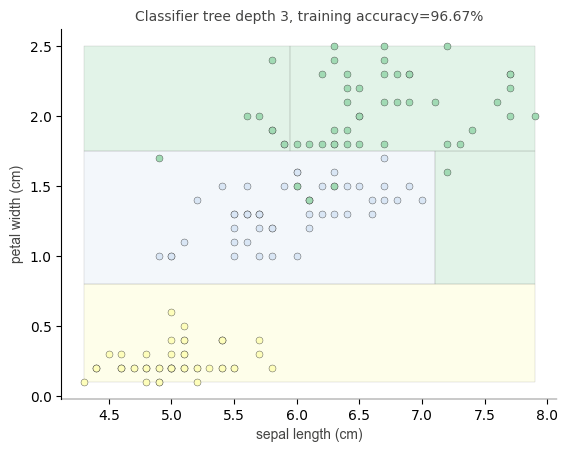

In [100]:
viz_model = dtreeviz.model(dtc_bivar,
                           X_train=X, y_train=y,
                           feature_names=['sepal length (cm)', 'petal width (cm)'], 
                           target_name='iris',
                           class_names=class_names)

viz_model.ctree_feature_space(nbins=40, gtype='barstacked', show={'splits','title'})

In [101]:
viz_model = dtreeviz.model(clf,
                           X_train=X_train, y_train=y_train,
                           feature_names=data['feature_names'],
                           class_names=data['target_names'])